**Caio Teles Cunha 2020006434** 

**Ivan Vilaça de Assis 2021421931**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Em nossa simulação do modelo SIR com automatos celulares, implementamos uma rede de pessoas (células) utilizando um lista em que cada uma possui 3 estados possíveis:
- 0 -> Suscetível, pode ser infectada
- 1 -> Infectada, transmitindo a doença
- 2 -> Recuperada, não mais suscetível

Sendo que, inicialmente, infectamos apenas uma pessoa e todas as outra estão como suscetíveis.

Reaproveitamos a função de definir os vizinhos de uma rede quadradada já fornecida anteriormente e criamos duas funções auxiliares. 

Uma para verificar a quantidade de vizinhos de uma pessoa sendo que isso será usado para checar se ela será infectada, quantos mais vizinhos, mais chances ela terá de se infectar.

Também fizemos uma para plotar a evolução do sistema no decorrer do passo de tempo.

In [2]:
# Direita, Cima, Esquerda, Baixo
def vizinhos(N):
  #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: 
      viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): 
      viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): 
      viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: 
      viz[k,3] = k+N-L
  return viz

In [3]:
def numInfNeighbours(neighbours, lattice):
  num = 0
  for i in neighbours:
    if(lattice[i] == 1):
      num += 1

  return num

In [4]:
def plotContEvolution(numS, numI, numR, time):
  x = np.arange(time)

  fig, ax = plt.subplots()

  ax.plot(x, numS, 'orange', label='Suscetíveis')
  ax.plot(x, numI, 'r', label='Infectados')
  ax.plot(x, numR, 'g', label='Recuperados com imunidade')

  ax.set_xlabel('Tempo')
  ax.set_ylabel('Indivíduos')
  ax.set_title('Evolução temporal de contágio')
  ax.legend()

  plt.show()

A seguir temos duas funções, a primeira implementa o modelo com o automato celular. Ela recebe duas probabilidades, a de contágio e a de recuperação, que são responsáveis por definir as condições de mudança das nossas célula. Ela retorna listas contendo a quantidade de pessoas suscetíveis, infectados e recuperados em cada passo do tempo em cada simulação.

A segunda função foi feita para nos permitir  obter dados de uma rede através de várias amostrar diferentes. Dessa forma, nós definimos quantas simulações faremos e tiramos a média do indívuos suscetíveis, infectados e recuperados em cada passo do tempo em cada simulação e plotamos essas médias para ver o comportamento da população.

In [5]:
def sirModel(latticeSide, Pc, Pr, time):
  N = latticeSide ** 2
  lattice = np.zeros(N)
  neighbourLattice = vizinhos(N)

  patientZero = np.random.randint(N)
  lattice[patientZero] = 1
  latticePhoto = lattice

  numOfSusceptible = np.zeros(time)
  numOfInfected = np.zeros(time)
  numOfRecovered = np.zeros(time)

  for t in range(time):
    cntS = 0
    cntI = 0
    cntR = 0

    for l in range(0, N):
      numInfNei = numInfNeighbours(neighbourLattice[l],latticePhoto)   

      if (latticePhoto[l] == 0):
        cntS += 1

        for i in range(0, numInfNei):
          p = np.random.uniform()
          if(p <= Pc):
            lattice[l] = 1
  
      elif(latticePhoto[l] == 1):
        cntI += 1
        p = np.random.uniform()
        if(p < Pr):
          lattice[l] = 2
      else:
        cntR += 1 

    latticePhoto = lattice

    numOfSusceptible[t] = cntS
    numOfInfected[t] = cntI
    numOfRecovered[t] = cntR
  
  return numOfSusceptible, numOfInfected, numOfRecovered      

In [8]:
def nSamplesSIR(latticeSide, Pc, Pr, time, amostras):
  numOfSusceptible = np.zeros(time)
  numOfInfected = np.zeros(time)
  numOfRecovered = np.zeros(time)
  
  for x in range(amostras):
    numS, numI, numR = sirModel(latticeSide, Pc, Pr, time)
    numOfSusceptible += numS
    numOfInfected += numI
    numOfRecovered += numR

  numOfSusceptible /= amostras
  numOfInfected /= amostras
  numOfRecovered /= amostras

  plotContEvolution(numOfSusceptible, numOfInfected, numOfRecovered, time)
  

Nas 3 simulações variando *Pc e Pr*, mantivemos uma rede quadrada de lado 50 e um passo de tempo de 200.

Na primeira, abaixo, com *Pc = 0.8 e Pr = 0.3* não demorou muito para rede se estabilizar. A taxa alta de contágio fez com que uma grande parcela da população se infectasse rapidamente, mas a taxa de recuperação foi, aparentemente, alta também porque a situação se estabilizou rapidamente antes que toda a população ficasse infectada. 

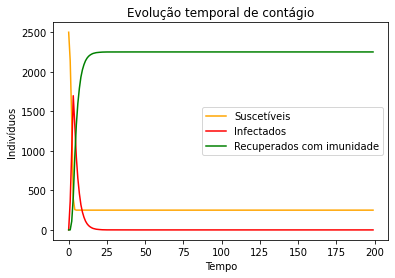

In [22]:
latticeSide = 50
Pc = 0.8
Pr = 0.3
time = 200
nSamplesSIR(latticeSide,Pc,Pr,200,10)

Na segunda simulação, colocamos um *Pc = 0.5 e Pr = 0.1* e, pelo que foi exibido no gráfico, esta é uma taxa de contágio bem baixa, visto que a quantidade de infectados não cresceu significativamente, ficando bem próxima a zero. Talvez teríamos mais infectado caso mudássemos Pr para um valor menor e também aumentássmos o tempo da simulação.

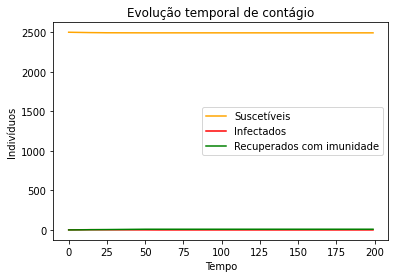

In [18]:
latticeSide = 50
Pc = 0.05
Pr = 0.1
time = 200
nSamplesSIR(latticeSide,Pc,Pr,200,10)

Na última simulação, fizemos *Pc = 0.05 e Pr = 0.01* e pelo gráfico gerado, não tivemos um tmepo de simulação grande o suficiente para que a situação se estabilizasse. Isso do tempo ocorreu porque pegamos taxas muitos baixas o que torna muito mais devagar as mudanças na população.

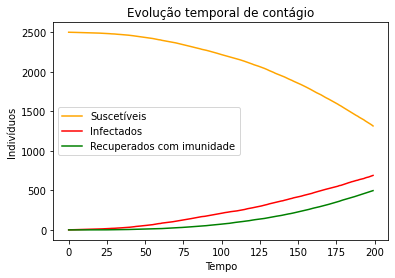

In [19]:
latticeSide = 50
Pc = 0.05
Pr = 0.01
time = 200
nSamplesSIR(latticeSide,Pc,Pr,200,10)